# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

In [ ]:
#Check the actual image

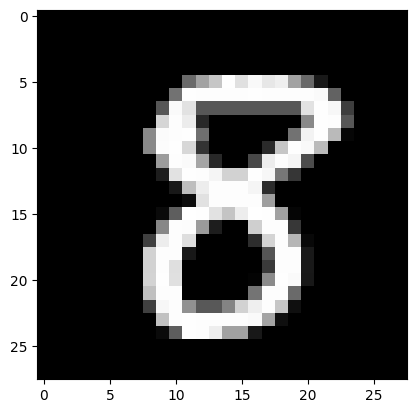

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 17s 34ms/step - loss: 0.2549 - accuracy: 0.9221 - val_loss: 0.1190 - val_accuracy: 0.9644
Epoch 2/30
469/469 [==============================] - 15s 31ms/step - loss: 0.1055 - accuracy: 0.9682 - val_loss: 0.0839 - val_accuracy: 0.9746
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0728 - val_accuracy: 0.9806
Epoch 5/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0733 - val_accuracy: 0.9801
Epoch 6/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0680 - val_accuracy: 0.9821
Epoch 7/30
469/469 [==============================] - 8s 18ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0653 - val_accuracy: 0.98

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09815128147602081
Test accuracy: 0.9847999811172485


Interpret the result

#type your answer here

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


#plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
supp_df = pd.read_csv('drive/My Drive/CPE313/buyukyilmaz.csv')

supp_df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


##### Data preprocessing

In [ ]:
print('Data Shape: ', supp_df.shape, '\n\n')

print('Data Types:\n', supp_df.dtypes)

Data Shape:  (3168, 21) 


Data Types:
 meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
gender       object
dtype: object


In [ ]:
supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  gender    3168 non-null   obje

In [ ]:
supp_df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'],
      dtype='object')

In [ ]:
le = LabelEncoder()

supp_df.gender = le.fit_transform(supp_df.gender)
supp_df.gender.head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

##### Data Splitting

In [ ]:
x = supp_df.drop('gender', axis = 1).values
y = supp_df.gender.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [ ]:
mm = MinMaxScaler()
x_train_norm = mm.fit_transform(x_train)
x_test_norm = mm.fit_transform(x_test)

##### NN Training

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_1 = Sequential()

#Building the first hidden layer with size 400
model_1.add(Dense(400, activation = 'relu', input_shape = (20, )))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_1.add(Dense(300, activation = 'relu'))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Displaying the details of the model_1
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               8400      
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 301       
                                                                 
Total params: 129001 (503.91 KB)
Trainable params: 129001 (503.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### How many parameters does your model have? How does it compare with the previous model?

Model_1 has 437310 parameters while model has has 669706 using the MNIST dataset. The model_1 specifically has lesser parameter than model because of the number of neurons given to each layers. For model, it has 512 neurons each layer resulting to

    model's total params =  (512 [Layer 1 neurons] * 784 [input_shape] + 512 [Bias])
    
                            + (512 [Layer 2 neurons] * 512 [input_shape] + 512 [Bias])
    
                            + (10 [output neurons] * 512 [input_shape] + 10 [bias])

                          = 669706

while

    model_1's total params = (400 [Layer 1 neurons] * 784 [input_shape] + 400 [Bias])
    
                            + (300 [Layer 2 neurons] * 400 [input_shape] + 300 [Bias])
    
                            + (10 [output neurons] * 300 [input_shape] + 10 [bias])

                          = 437310

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

hist_1 = model_1.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/20
38/38 [==============================] - 1s 11ms/step - loss: 1.4898 - accuracy: 0.5130 - val_loss: 1.1361 - val_accuracy: 0.6124
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 1.2461 - accuracy: 0.5779 - val_loss: 0.8280 - val_accuracy: 0.5202
Epoch 3/20
38/38 [==============================] - 0s 10ms/step - loss: 1.1924 - accuracy: 0.6027 - val_loss: 0.9067 - val_accuracy: 0.6427
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.9870 - accuracy: 0.6322 - val_loss: 0.7234 - val_accuracy: 0.6717
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.8472 - accuracy: 0.6646 - val_loss: 0.8624 - val_accuracy: 0.6705
Epoch 6/20
38/38 [==============================] - 0s 10ms/step - loss: 0.9387 - accuracy: 0.6835 - val_loss: 0.9932 - val_accuracy: 0.6313
Epoch 7/20
38/38 [==============================] - 0s 9ms/step - loss: 0.8870 - accuracy: 0.7066 - val_loss: 0.5847 - val_accuracy: 0.7071
Epoch 8/20
38/3

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.48316308856010437
Test accuracy: 0.8232323527336121


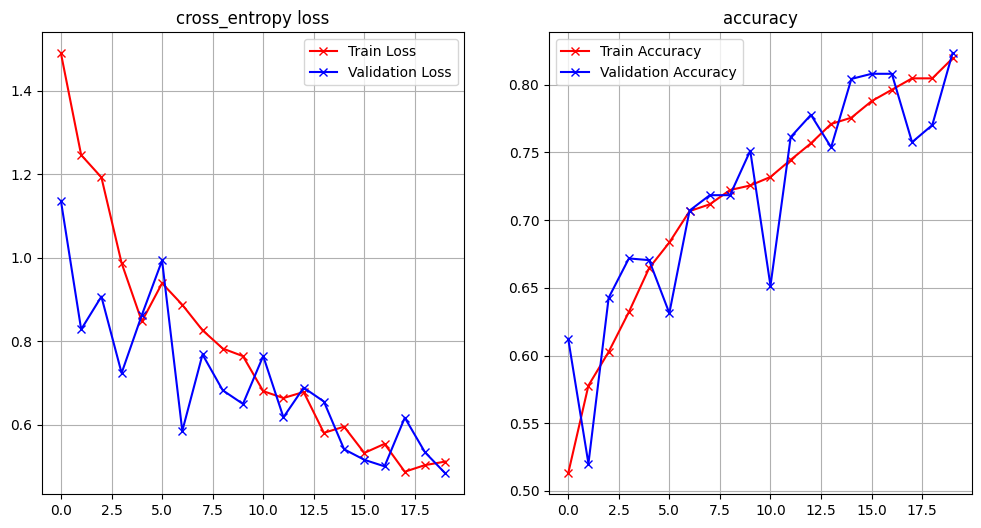

In [ ]:
plot_loss_accuracy(hist_1)

##### Use at least two regularization techniques and apply it to the new model (model_2)

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_2 = Sequential()

#Building the first hidden layer with size 400
model_2.add(Dense(400, activation = 'relu', input_shape = (20, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_2.add(Dense(300, activation = 'relu', kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_2.add(Dense(1, activation = 'sigmoid',  kernel_regularizer = regularizers.l1(0.001)))

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/20
19/19 [==============================] - 1s 18ms/step - loss: 7.0845 - accuracy: 0.5021 - val_loss: 5.6541 - val_accuracy: 0.5013
Epoch 2/20
19/19 [==============================] - 0s 8ms/step - loss: 5.4663 - accuracy: 0.5139 - val_loss: 4.4874 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 0s 8ms/step - loss: 4.4983 - accuracy: 0.5434 - val_loss: 3.8734 - val_accuracy: 0.5126
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 3.8931 - accuracy: 0.5543 - val_loss: 3.3261 - val_accuracy: 0.5783
Epoch 5/20
19/19 [==============================] - 0s 8ms/step - loss: 3.4960 - accuracy: 0.5606 - val_loss: 3.3857 - val_accuracy: 0.6503
Epoch 6/20
19/19 [==============================] - 0s 9ms/step - loss: 3.1746 - accuracy: 0.5737 - val_loss: 2.9376 - val_accuracy: 0.6187
Epoch 7/20
19/19 [==============================] - 0s 8ms/step - loss: 2.9397 - accuracy: 0.5816 - val_loss: 3.0109 - val_accuracy: 0.5139
Epoch 8/20
19/19 [=

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 1.3137102127075195
Test accuracy: 0.6729797720909119


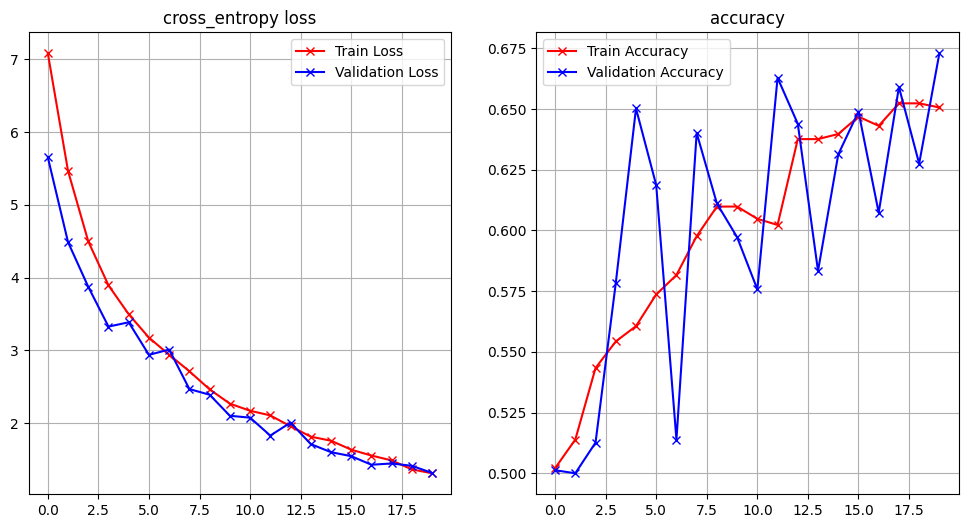

In [ ]:
plot_loss_accuracy(hist_2)

##### Train this model for your preferred epochs , learning rate, batch size and optimizer

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_2 = Sequential()

#Building the first hidden layer with size 400
model_2.add(Dense(400, activation = 'relu', input_shape = (20, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_2.add(Dense(300, activation = 'relu', kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_2.add(Dense(1, activation = 'sigmoid',  kernel_regularizer = regularizers.l1(0.001)))

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.0001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 100,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 5.7906 - accuracy: 0.5219 - val_loss: 4.6021 - val_accuracy: 0.5076
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 3.9997 - accuracy: 0.5332 - val_loss: 3.2429 - val_accuracy: 0.5076
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 3.4431 - accuracy: 0.5316 - val_loss: 3.1168 - val_accuracy: 0.6326
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 3.1382 - accuracy: 0.5682 - val_loss: 2.6604 - val_accuracy: 0.5164
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 2.6799 - accuracy: 0.5673 - val_loss: 2.4663 - val_accuracy: 0.5896
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 2.4866 - accuracy: 0.6019 - val_loss: 2.3345 - val_accuracy: 0.6098
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 2.3723 - accuracy: 0.6069 - val_loss: 2.4310 - val_accuracy: 0.6149
Epoch 8/100
7

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.4013897776603699
Test accuracy: 0.8838383555412292


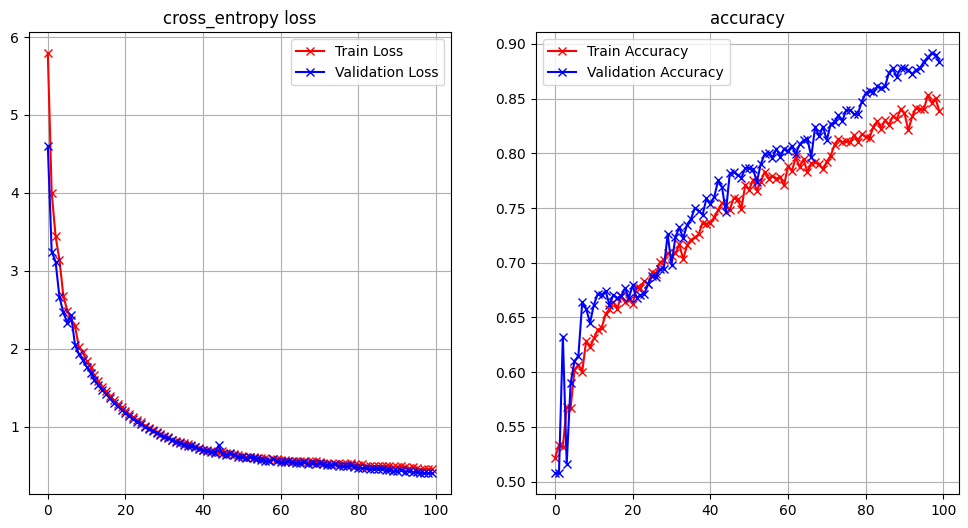

In [ ]:
plot_loss_accuracy(hist_2)

##### Trial 1

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.0001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 256,
    epochs = 75,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/75
10/10 [==============================] - 2s 33ms/step - loss: 0.4062 - accuracy: 0.9234 - val_loss: 0.3736 - val_accuracy: 0.9470
Epoch 2/75
10/10 [==============================] - 0s 14ms/step - loss: 0.3934 - accuracy: 0.9192 - val_loss: 0.3642 - val_accuracy: 0.9280
Epoch 3/75
10/10 [==============================] - 0s 13ms/step - loss: 0.3757 - accuracy: 0.9263 - val_loss: 0.3448 - val_accuracy: 0.9470
Epoch 4/75
10/10 [==============================] - 0s 13ms/step - loss: 0.3809 - accuracy: 0.9192 - val_loss: 0.3496 - val_accuracy: 0.9369
Epoch 5/75
10/10 [==============================] - 0s 13ms/step - loss: 0.3898 - accuracy: 0.9108 - val_loss: 0.3475 - val_accuracy: 0.9356
Epoch 6/75
10/10 [==============================] - 0s 14ms/step - loss: 0.3713 - accuracy: 0.9247 - val_loss: 0.3448 - val_accuracy: 0.9343
Epoch 7/75
10/10 [==============================] - 0s 13ms/step - loss: 0.3701 - accuracy: 0.9217 - val_loss: 0.3548 - val_accuracy: 0.9495
Epoch 8/75
10

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.303088515996933
Test accuracy: 0.9532828330993652


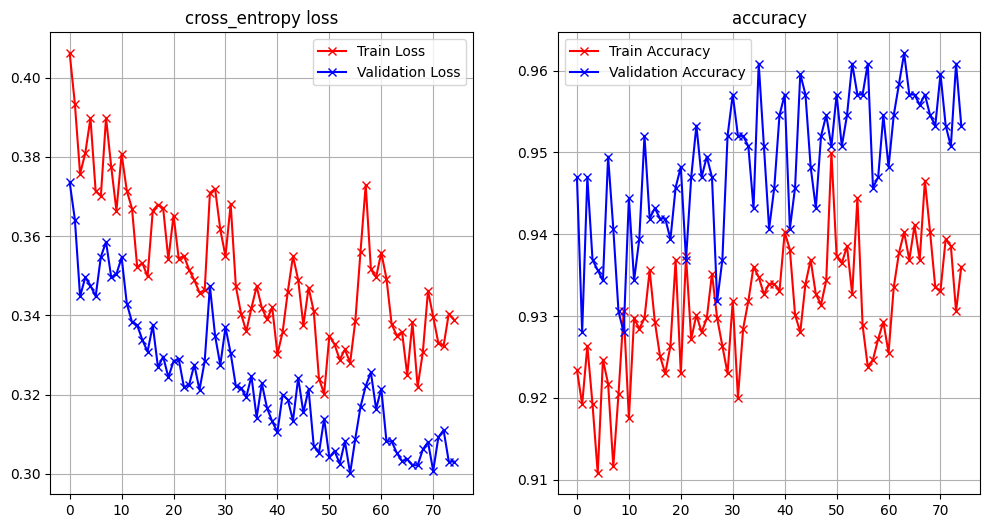

In [ ]:
plot_loss_accuracy(hist_2)

#### Conclusion

#type your answer here